In [11]:

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
from rotate import *


In [12]:
# we'll go back to the funtion we are fitting for to just be a parabola
from scipy.optimize import least_squares

def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    #aroundX = coeffs[4]
    #aroundY = coeffs[5]
    #return  (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + v2
    hr = 30.
    r2 = (xdata - v1x)**2 + (ydata - v1y)**2
    return ( 1 / (4.*f) ) * r2 * ( hr**2 > r2 )  + v2

# and we will define a new errfun to fit this data
def errfun(coeffs, xdata, ydata, zdata):
    
    # rotate the original data first!
    xr, yr, zr = rotateXY(xdata, ydata, zdata, coeffs[4], coeffs[5])
    #xr = xdata
    #yr = ydata
    #zr = zdata
    z = fun(coeffs, xr, yr)
    # now what we are trying to minimize is the difference between the rotated 
    # input data and a parabola in the same frame
    return zr - z

In [50]:
##########################
#     Create  Data       #
##########################
xs = np.linspace(-20, 20)
ys = np.linspace(-20, 20)

xs2d, ys2d = np.meshgrid(xs, ys)

f = 5.0
v1x = 0.0
v1y = 0.0
v2 = 10.0
xRot = np.pi/10
yRot = np.pi/10

zs2d = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2
xdata, ydata, zdata = rotateXY(xs2d, ys2d, zs2d, xRot, yRot)

##########################
#     Create  Fit        #
##########################
coeffs = [f, v1x, v1y, v2, -xRot, -yRot]
inf = np.inf
pi2 = 2*np.pi
b1 = [-inf, -inf, -inf, -inf, -pi2, -pi2]
b2 = [inf, inf, inf, inf, pi2, pi2]
bounds = (b1, b2)
r = least_squares(errfun, coeffs, args=(xdata.flatten(), ydata.flatten(), zdata.flatten()),
                      bounds=bounds,
                      method='trf',
                      max_nfev=100000,
                      gtol=1e-15,
                      ftol=1e-15,
                      xtol=1e-15)
# Look into robust method (loss='soft_l1', f_scale=0.1)
print "fit:", r.x
print r.success, r.message, r.nfev

fit: [ 5.00000000e+00 -2.95365420e-15 -5.99629781e-16  1.00000000e+01
 -3.29208537e-01 -2.98296775e-01]
True `xtol` termination condition is satisfied. 6


In [38]:
def simData(xs2d, ys2d, f, v1x, v1y, v2, xRot, yRot):

    zs2d = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2
    xdata, ydata, zdata = rotateXY(xs2d, ys2d, zs2d, xRot, yRot)
    return xdata, ydata, zdata

In [51]:
fFit, v1xFit, v1yFit, v2Fit, xRotFit, yRotFit = r.x
xfit, yfit, zfit = simData(xs2d, ys2d, fFit, v1xFit, v1yFit, v2Fit, -xRotFit, -yRotFit)
#zfit = (1 / (4.*fFit))*(xdata  - v1xFit)**2 +  (1 / (4.*f))*(ydata - v1yFit)**2 + v2Fit
#xr3, yr3, zfit = rotateXY(xdata, ydata, zfit, -xRotFit, -yRotFit)

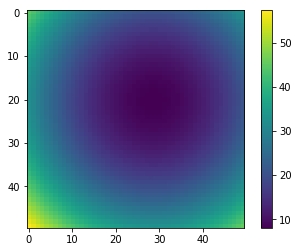

In [52]:
f = plt.figure()
ax = f.gca()
cax = ax.imshow(zfit)
f.colorbar(cax)


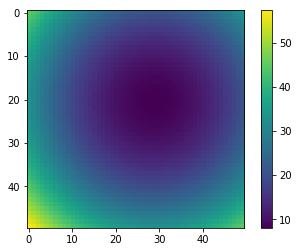

In [53]:
f = plt.figure()
ax = f.gca()
cax = ax.imshow(zdata)
f.colorbar(cax)

In [33]:
print zfit.shape, zdata.shape

(50, 50) (50, 50)


Text(0.5,0,'y')

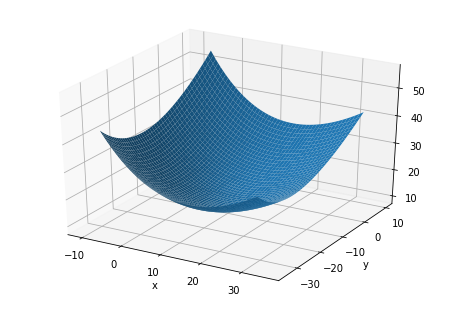

In [54]:
f = plt.figure()
ax = Axes3D(f)
ax.plot_surface(xdata, ydata, zdata)
plt.xlabel('x')
plt.ylabel('y')

Text(0.5,0,'y')

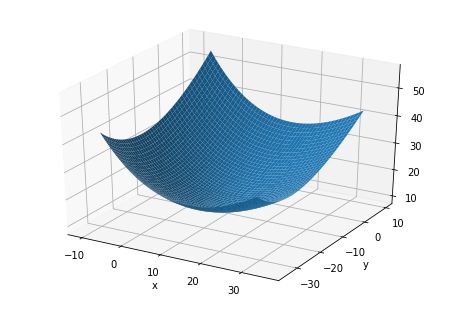

In [55]:
f = plt.figure()
ax = Axes3D(f)
ax.plot_surface(xdata, ydata, zfit)
plt.xlabel('x')
plt.ylabel('y')